In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import metapredict as meta

sns.set_theme(rc={'figure.figsize':(6,4), 'figure.dpi':300})
sns.set_style("white")

In [17]:
known_ADs = pd.read_csv("../output/known_ADs_considering_isoforms_and_canonical.csv")
known_ADs

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes
0,ABRAXAS1,121,200,Q6UWZ7,[['Q6UWZ7']],ENST00000321945,Q6UWZ7,DelRosso et al.,CR,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,NaN
1,AEBP1,1088,1158,Q8IUX7,[['Q8IUX7']],NaN,Q8IUX7,Staller Activity Data,TF,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,NaN
2,AHCTF1,1445,1698,Q8WYP5,"[['Q8WYP5'], ['Q8WYP5']]",nan / nan,Q8WYP5 / Q8WYP5,"PMID: 11952839, Soto / transcriptionalactivity...",TF,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,NaN
3,AHR,118,126,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,LLQALNGFV,NaN
4,AHR,266,268,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,FAI,NaN
...,...,...,...,...,...,...,...,...,...,...,...
739,ZSCAN20,262,341,P17040,"[['P17040', 'P17040-3']]",ENST00000361328,P17040,DelRosso et al.,TF,PSNTSEKEQGPEFWGLSLINSGKRSTADYSLDNEPAQALTWRDSRA...,NaN
740,ZXDA,572,699,P98168,"[['P98168'], ['P98168']]",nan / nan,P98168 / P98168 / P98168,"PMID: 17493635, Soto / R4TA_regions.txt / acti...",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN
741,ZXDB,576,703,P98169,[['P98169']],NaN,P98169 / P98169,"R4TA_regions.txt / activation_regions.txt, GSL",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN
742,ZXDC,579,688,Q2QGD7,"[['Q2QGD7', 'Q2QGD7-2'], ['Q2QGD7', 'Q2QGD7-2']]",nan / nan,Q2QGD7 / Q2QGD7 / Q2QGD7,"PMID: 16600381, Soto / R4TA_regions.txt / acti...",TF,DSPLVLGTAATVLQQGSFSVDDVQTVSAGALGCLVALPMKNLSDDP...,NaN


In [18]:
disorder_scores = [meta.percent_disorder(_) for _ in known_ADs["ProteinRegionSeq"]]
known_ADs["metapredict_percent_disorder"] = disorder_scores
known_ADs

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes,metapredict_percent_disorder
0,ABRAXAS1,121,200,Q6UWZ7,[['Q6UWZ7']],ENST00000321945,Q6UWZ7,DelRosso et al.,CR,LQEHFSNQDLVFLLLTPSIITESCSTHRLEHSLYKPQKGLFHRVPL...,NaN,92.500
1,AEBP1,1088,1158,Q8IUX7,[['Q8IUX7']],NaN,Q8IUX7,Staller Activity Data,TF,EVVTEFGTEVEPEFGTKVEPEFETQLEPEFETQLEPEFEEEEEEEK...,NaN,100.000
2,AHCTF1,1445,1698,Q8WYP5,"[['Q8WYP5'], ['Q8WYP5']]",nan / nan,Q8WYP5 / Q8WYP5,"PMID: 11952839, Soto / transcriptionalactivity...",TF,IRANDNKSMADVLGDGGNSSLTISEGPIVSERRLNQEVALNLKEDH...,NaN,94.488
3,AHR,118,126,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,LLQALNGFV,NaN,100.000
4,AHR,266,268,P35869,[['P35869']],NaN,P35869,"transcriptionalactivity_regions.txt, GSL",TF,FAI,NaN,100.000
...,...,...,...,...,...,...,...,...,...,...,...,...
739,ZSCAN20,262,341,P17040,"[['P17040', 'P17040-3']]",ENST00000361328,P17040,DelRosso et al.,TF,PSNTSEKEQGPEFWGLSLINSGKRSTADYSLDNEPAQALTWRDSRA...,NaN,17.500
740,ZXDA,572,699,P98168,"[['P98168'], ['P98168']]",nan / nan,P98168 / P98168 / P98168,"PMID: 17493635, Soto / R4TA_regions.txt / acti...",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,100.000
741,ZXDB,576,703,P98169,[['P98169']],NaN,P98169 / P98169,"R4TA_regions.txt / activation_regions.txt, GSL",TF,QDLLAQLEAANSLTPSSELTSQRQNDLSDAEIVSLFSDVPDSTSAA...,NaN,100.000
742,ZXDC,579,688,Q2QGD7,"[['Q2QGD7', 'Q2QGD7-2'], ['Q2QGD7', 'Q2QGD7-2']]",nan / nan,Q2QGD7 / Q2QGD7 / Q2QGD7,"PMID: 16600381, Soto / R4TA_regions.txt / acti...",TF,DSPLVLGTAATVLQQGSFSVDDVQTVSAGALGCLVALPMKNLSDDP...,NaN,90.000


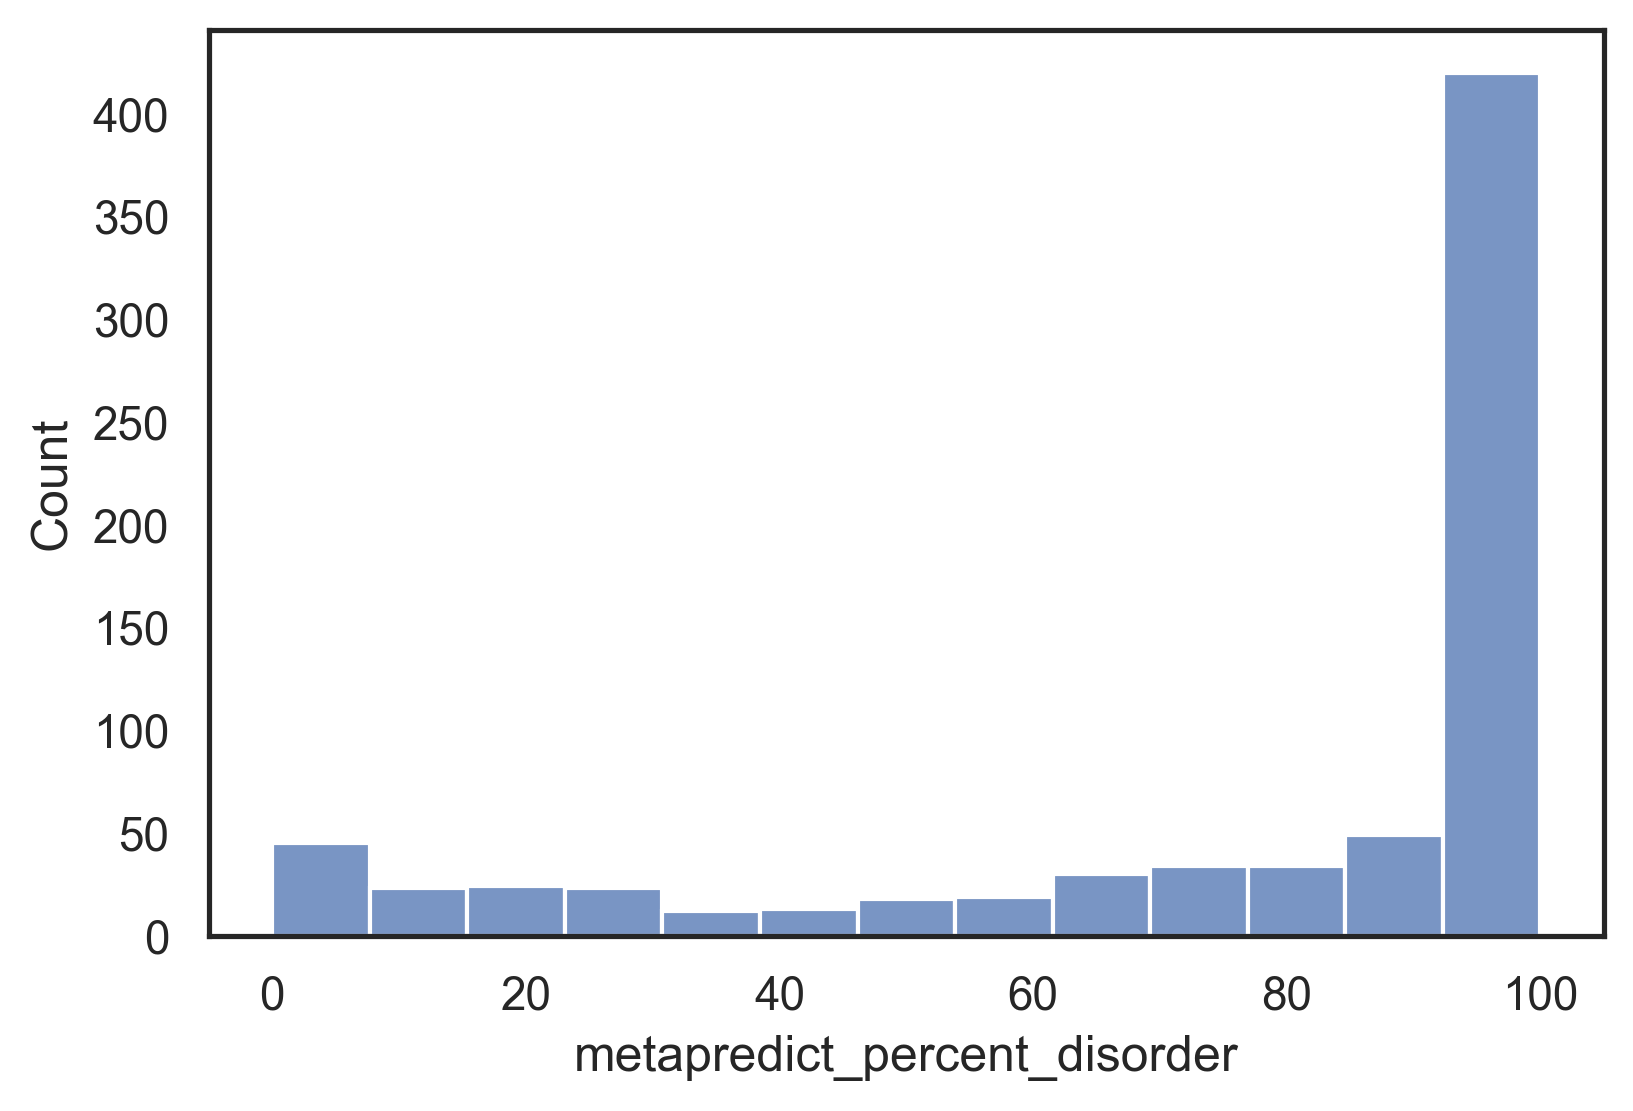

In [23]:
sns.histplot(known_ADs["metapredict_percent_disorder"]);

In [30]:
known_ADs[known_ADs["metapredict_percent_disorder"] < 70]

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes,metapredict_percent_disorder
6,AIRE,292,545,O43918,[['O43918']],NaN,O43918,"PMID: 11274163, Soto",TF,HQKNEDECAVCRDGGELICCDGCPRAFHLACLSPPLREIPSGTWRC...,NaN,55.906
14,APOBEC4,21,100,Q8WW27,[['Q8WW27']],ENST00000308641,Q8WW27,DelRosso et al.,CR,WLSFSLDCSNCPYHIRTGEEARVSLTEFCQIFGFPYGTTFPQTKHL...,NaN,40.000
16,AR,652,910,P10275,[['P10275']],NaN,P10275,"PMID: 9033395, Soto",TF,PTEETTQKLTVSHIEGYECQPIFLNVLEAIEPGVVCAGHDNNQPDS...,NaN,3.089
17,ARGFX,142,315,A6NJG6,"[['A6NJG6'], ['A6NJG6']]",ENST00000334384 / ENST00000334384,A6NJG6 / A6NJG6,DelRosso et al. / DelRosso et al.,TF,AKQRNQILPSKKNVPTSPRTSPSPYAFSPVISDFYSSLPSQPLDPS...,NaN,66.667
24,ASXL3,1011,1110,Q9C0F0,"[['Q9C0F0'], ['Q9C0F0']]",ENST00000269197 / ENST00000269197,Q9C0F0 / Q9C0F0,DelRosso et al. / DelRosso et al.,CR,PLKIQLSKIGPPFIIKSQPVSKPESRASTSTSVSGGRNTGARTLAD...,NaN,69.000
...,...,...,...,...,...,...,...,...,...,...,...,...
722,ZNF143,178,195,P52747,[['P52747']],NaN,P52747,"PMID: 9566884, Soto",TF,PDTISALEQYAAKVSIDG,NaN,22.222
726,ZNF200,52,151,P98182,"[['P98182', 'P98182-3']]",ENST00000431561,P98182,DelRosso et al.,TF,TFLPKPSLVQPSQKVKETLVIMKDVSSSLQNRVHPRPLVKLLPKGV...,NaN,33.000
729,ZNF426,99,213,Q9BUY5,[['Q9BUY5']],NaN,Q9BUY5,"PMID: 17409159, Soto",TF,SRTVQGGVLQGWEMRLETQWSILQQDFLRGQTSIGIQLEGKHNGRE...,NaN,14.783
733,ZNF516,1,431,Q92618,[['Q92618']],NaN,Q92618,"activation_regions.txt, GSL",TF,MDRNREAEMELRRGPSPTRAGRGHEVDGDKATCHTCCICGKSFPFQ...,NaN,48.492


In [38]:
known_ADs[known_ADs["metapredict_percent_disorder"] == 0]

,Gene,Start,End,uniprotID,Matching Isoforms,Canonical Transcript ID,orig_uniprotID,Reference,TileType,ProteinRegionSeq,Notes,metapredict_percent_disorder
424,NR1I2,146,434,O75469,[['O75469']],NaN,O75469,"PMID: 12805410, Soto",TF,EQRMMIRELMDAQMKTFDTTFSHFKNFRLPGVLSSGCELPESLQAP...,NaN,0.0
501,PPP2CA,151,250,P67775,[['P67775']],ENST00000481195,P67775,DelRosso et al.,CR,DYLPLTALVDGQIFCLHGGLSPSIDTLDHIRALDRLQEVPHEGPMC...,NaN,0.0
539,RORA,272,385,P35398,[['P35398']],NaN,P35398,"PMID: 10478845, Soto",TF,ELEHLAQNISKSHLETCQYLREELQQITWQTFLQEEIENYQNKQRE...,NaN,0.0
715,ZN473,3,48,Q8WTR7,[['Q8WTR7']],NaN,Q8WTR7,Staller Activity Data,TF,EEFVTLKDVGMDFTLGDWEQLGLEQGDTFWDTALDNCQDLFLLDPP,NaN,0.0
